<a href="https://colab.research.google.com/github/panzershracker/Data-analysis-algorithms/blob/master/HW_les_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [72]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [73]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [76]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [0]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  err = np.sum(err)
  return err

In [78]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [0]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [0]:
z = np.linspace(-10, 10, 101)

In [0]:
probabilities = sigmoid(z)

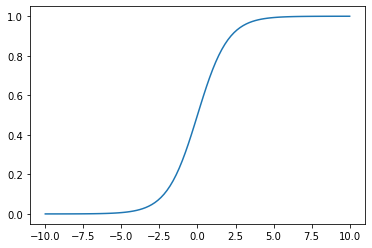

In [82]:
plt.plot(z, probabilities)

In [0]:
### Logistic Regression

In [0]:
# W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)

In [0]:
def eval_model(X, y, iterations, print_=1, alpha=1e-4, reg=0, lambda_=0):
  W = np.random.randn(X.shape[0])
  
  if reg is 'l2':
    reg = lambda_ * W
  if reg is 'l1':
    reg = lambda_ * np.sign(W)
  else:
    reg = 0

  np.random.seed(42)
  # W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T) + reg)
    if print_ == 1:
      if i % (iterations / 10) == 0:
        print(i, W, err)
  return W

In [86]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4, print_=1)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


#**Домашнее задание**

---





###1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

Хотя, как мне кажется, вероятность попадания нуля в функцию логарифмирования крайне мала, проще будет решить задачу, если переформулировать ее следующим образом: Изменить функцию так, чтобы аргументом функции логарифмирования не был ноль, и ошибка связанная с этим не возникала.
Для этого добавим некоторую погрешность "e" к каждому элементу предсказанного массива.

Если действовать строго по условиям задачи, то необходимо проводить дополнительную проверку элементов предсказанного массива до передачи в формулу логлос на наличие вероятностей 1 и 0, и так же добавлять или вычитать эту погрешность, но этот метод более ресурсоемкий и займет больше времени.

In [0]:
e = 1e-30
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred + e) + (1.0 - y) * np.log(1.0 - (y_pred - e)))
  err = np.sum(err)
  return err

###2.Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [88]:
W = eval_model(X_st, y, iterations=10000, alpha=2.8)

1000 [-23.07359111  -2.44431447  -5.92159612  19.12659928] 0.1668583851674066
2000 [-30.03648887  -3.07911011  -7.96042548  24.68661333] 0.13505397288502902
3000 [-35.1435287   -3.52865738  -9.43104437  28.8033361 ] 0.11874820300730635
4000 [-39.24955206  -3.88594982 -10.60976297  32.0976852 ] 0.10827500617699111
5000 [-42.72848225  -4.18380632 -11.60894713  34.87506893] 0.10079407865274126
6000 [-45.78028608  -4.44013098 -12.48760854  37.29900135] 0.09506246060769659
7000 [-48.52362308  -4.66572919 -13.28028066  39.46666821] 0.09044952142247831
8000 [-51.03430763  -4.86763061 -14.00876089  41.44032007] 0.08660030725592985
9000 [-53.36350688  -5.05068427 -14.68758784  43.26212674] 0.08329911923123128
10000 [-55.54723062  -5.2183962  -15.32686915  44.96191843] 0.0804069565824499


### 3.Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

* Добавим в функцию eval_model аргумент print_ для возможности вывода печати.

In [0]:
W = eval_model(X_st, y, iterations=10000, alpha=2.8, print_=0)

z = X_st.T @ W

y_pred_proba = sigmoid(z)

In [91]:
y_pred_proba

array([3.12240520e-01, 8.15113533e-04, 1.00000000e+00, 1.88813905e-02,
       9.76046006e-01, 6.34437146e-03, 1.00000000e+00, 5.25053129e-03,
       6.87994534e-01, 1.00000000e+00])

###4.Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [0]:
def calc_pred(y_pred_proba):
  probs = []
  for i in y_pred_proba:
    if i > 0.5:
      probs.append(1)
    else:
      probs.append(0)
  print(probs)
  return probs

In [93]:
y_pred = calc_pred(y_pred_proba)

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


###5.Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.


In [0]:
def confusion(y, y_pred):
  TP, FP, TN, FN = 0,0,0,0

  for i in range(len(y)):
    if y[i] == y_pred[i] == 1:
      TP += 1
    if y[i] == y_pred[i] == 0:
      TN += 1
    if y[i] == 1 and y_pred[i] != y[i]:
      FP += 1
    if y[i] == 0 and y_pred[i] != y[i]:
      FN += 1

  return (TP, FP, TN, FN)

In [0]:
conf = confusion(y, y_pred)
TP,FP,TN,FN = conf[0], conf[1], conf[2], conf[3]

In [96]:
TP,FP,TN,FN

(5, 0, 5, 0)

In [0]:
def Accuracy(TP, FP, TN, FN):
  return (TP + TN)/ (TP + TN + TN + FN)

In [0]:
def Precision(TP, FP):
  return TP / (TP + FP)

In [0]:
def Recall(TP, FN):
  return TP / (TP + FN)

In [0]:
def F1(precision, recall):
  return 2* ((precision * recall) / (precision + recall))

In [101]:
accuracy = Accuracy(TP, FP, TN, FN)
accuracy

0.6666666666666666

In [102]:
precision = Precision(TP, FP)
precision

1.0

In [103]:
recall = Recall(TP, FN)
recall

1.0

In [104]:
f1 = F1(precision, recall)
f1

1.0

In [105]:
conf_matrix = np.array([[TP,FP],
                        [FN,TN]])

conf_matrix

array([[5, 0],
       [0, 5]])

###6.Могла ли модель переобучиться? Почему?


Я считаю, что,скорее всего, модель переобучилась, т.к. мы сильно подгоняли ее изначально для снижения ошибки (во втором задании), сравнивая с правильным результатом, но на какой-либо отложенной выборке, скорее всего, она показала бы себя не с лучшей стороны. Я долго думал над этим вопросом, но другого ответа пока не вижу.

###7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

#**!**
Добавил именованные аргументы к исходной функции для регуляризаций, чтобы не переписывать всю функцию.

In [106]:
eval_model(X_st, y, iterations=10000, alpha=1e-4, print_=1, reg='l1', lambda_=1e-4)

1000 [ 0.4588588  -0.25438918  0.64530343  1.46694852] 1.039517804987923
2000 [ 0.42366746 -0.36357989  0.64252381  1.41504967] 0.8807634470495538
3000 [ 0.39198067 -0.45897217  0.64077568  1.3697176 ] 0.7587632337679446
4000 [ 0.36451836 -0.53303326  0.64179979  1.3333347 ] 0.6825386868249015
5000 [ 0.34108675 -0.58521791  0.64599767  1.305874  ] 0.6416837633324349
6000 [ 0.32082596 -0.62081869  0.65254637  1.28537796] 0.6200722358423554
7000 [ 0.3029026  -0.64519901  0.6605463   1.26986124] 0.6077757729911407
8000 [ 0.28671271 -0.66205094  0.66938849  1.25789942] 0.6000585440896278
9000 [ 0.27183974 -0.67374109  0.67869804  1.24853085] 0.5947139725050786
10000 [ 0.25799209 -0.68181033  0.6882424   1.24109682] 0.5906705971689438


array([ 0.25799209, -0.68181033,  0.6882424 ,  1.24109682])

In [107]:
eval_model(X_st, y, iterations=10000, alpha=1e-4, print_=1, reg='l2', lambda_=1e-4)

1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489
2000 [ 0.4236874  -0.36359967  0.6425439   1.41506965] 0.8807599507543653
3000 [ 0.39201058 -0.45900098  0.64080604  1.36974771] 0.758759980653503
4000 [ 0.36455825 -0.53307004  0.64184068  1.33337513] 0.6825375010766789
5000 [ 0.34113653 -0.58526221  0.64604926  1.30592474] 0.6416846622934699
6000 [ 0.32088549 -0.6208707   0.65260867  1.28543874] 0.6200744628368994
7000 [ 0.30297172 -0.64525903  0.66061929  1.26993179] 0.6077787494981906
8000 [ 0.28679129 -0.66211922  0.66947217  1.2579795 ] 0.600061942845909
9000 [ 0.27192766 -0.67381777  0.67879241  1.24862026] 0.5947176154622895
10000 [ 0.25808924 -0.68189547  0.68834749  1.2411954 ] 0.5906743816929662


array([ 0.25808924, -0.68189547,  0.68834749,  1.2411954 ])